# Einsums in the wild  
**By Gerardo Durán-Martín** ([@grrddm](https://github.com/gerdm))

Adapted from [grrdm.notion.so](https://grrddm.notion.site/Einsums-in-the-wild-bd773f01ba4c463ca9e4c1b5a6d90f5f)

> Do you know what `inm,kij,jnm->knm` is all about?

In [ ]:
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
%config InlineBackend.figure_format = "retina"

# Introduction

Linear combinations are ubiquitous in machine learning and statistics. Many algorithms and models in the statistics and machine learning literature can be written (or approximated) as a matrix-vector multiplication. Einsums are a way of representing the linear interaction among vectors, matrices and higher-order dimensional arrays.

In this post, I lay out examples that make use of Einsums. I assume that the reader is familiar with the basics of einsums. However, I provide a quick introduction in the next section. For furthere references, see also [[1]](https://rockt.github.io/2018/04/30/einsum) and [[2]](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html). Throughout this post, we borrow from the [numpy literature](https://numpy.org/doc/stable/reference/arrays.ndarray.html) and denote the element ${\bf x} \in \mathbb{R}^{M_1 \times M_2 \times \ldots \times M_N}$ as an $N$-dimensional array.

In the next section, we present a brief summary of einsum expressions and its usage in numpy / jax.numpy.

## An quick introduction to einsums: from sums to indices

Let ${\bf a}\in\mathbb{R}^M$ a 1-dimensional array. We denote by $a_m$ the $m$-th element of $\bf a$. Suppose we want to express the sum over all elements in $\bf a$. This can be written as

$$
\sum_{m=1}^M a_m
$$

To introduce the einsum notation, we notice that the sum symbol ($\Sigma$) in this equation simply states that we should consider all elements of $\bf a$ and sum them. If we assume that 1) there is no ambiguity on the number of dimensions in $\bf a$ and 2) we sum over all of its elements, we define the einsum notation for the sum over all elements in the 1-dimensional array $\bf a$ as

$$
\sum_{m=1}^N a_m\stackrel{\text{einsum}}{\equiv} {\bf a}_m
$$

To keep our notation consistent,  we denote indices with parenthesis as *static* dimensions. Static dimensions allows us to expand the expressiveness power of einsums. That is, we denote all of the elements of $\bf a$ under the einsum notation as ${\bf a}_{(m)}$.

Since the name of the arrays are not necessarily meaningful to define these expressions, we define einsum expressions in numpy by focusing only on the indices. To represent which dimensions are *static* and which should be summed over, we introduce the `->` notation. Elements to the left of `->` define the set of indices of an array and elements to the right of `->` represent indices that we do **not** sum over. For example, the sum over all elements in $\bf a$ is written as

$$
{\bf a}_m \equiv \texttt{m->}
$$

and the selection of all elements of $\bf a$ is written as

$$
{\bf a}_{(m)} \equiv \texttt{m->m}
$$

In the following snippet, we show this notation in action.

In [8]:
a = np.array([1, 2, 3, 4])
np.einsum("m->", a)

10

In [9]:
np.einsum("m->m", a)

array([1, 2, 3, 4])

## Higher-dimensional arrays

Let ${\bf a}\in\mathbb{R}^M$ and ${\bf b}\in\mathbb{R}^M$ be two one-dimensional arrays. The dot product between $\bf a$ and $\bf b$ can be written as

$$
\begin{aligned}
{\bf a}^T {\bf b} &= a_1 b_1 + \ldots + a_M b_M \\
&= \sum_{m=1}^M a_m b_m
\end{aligned}
$$

Following our previous notation, we see that the representation of this einsum expression in mathematical and numpy form is

$$
{\bf a}_m {\bf b}_m \equiv \texttt{m,m->}
$$

Furthermore, the einsum representation of the element-wise product between $\bf a$ and $\bf b$ is given by

$$
{\bf a}_{(m)} {\bf b}_{(m)} \equiv \texttt{m,m->m}
$$

As an example, consider the following 1-dimensional arrays `a` and `b`

In [15]:
a = np.array([1, 3, 1])
b = np.array([-1, 2, -2])

In [16]:
# dot product
a @ b

3

In [17]:
np.einsum("m,m->", a, b)

3

In [18]:
# Element-wise product
a * b

array([-1,  6, -2])

In [19]:
np.einsum("m,m->m", a, b)

array([-1,  6, -2])

We can generalise the ideas previously presented. Consider the matrix-vector multiplication between ${\bf A}\in\mathbb{R}^{N\times M}$ and ${\bf x}\in\mathbb{R}^M$. We can write this in linear algebra form as

$$
\begin{aligned}
{\bf A x} &= 
\begin{bmatrix}
{\bf a}_1^T \\
\vdots \\
{\bf a}_N^T
\end{bmatrix} {\bf x}\\
&= \begin{bmatrix}
{\bf a}_1^T {\bf x} \\
\vdots \\
{\bf a}_N^T {\bf x}
\end{bmatrix}
\end{aligned}
$$

Where we have denoted ${\bf a}_n^T$ as the $n$-th row of $\bf A$. From the equation above, we notice that the $n$-th entry of ${\bf A x} \in \mathbb{R}^N$ can be expressed as

$$
\begin{aligned}
({\bf Ax})_n &= \sum_{m=1}^M a_{n,m} x_m
\end{aligned}
$$

We also observe that the first dimension of $\bf A$ for this expression is is static. The einsum representation in mathematical/numpy form becomes

$$
{\bf A}_{(n),m}{\bf x}_m \equiv \texttt{nm,m->n}
$$

Considering the result of the last example, we can easily express the resulting $i,j$-th entry of the  multiplication between two matrices. Let ${\bf A}\in\mathbb{R}^{N\times M}$, ${\bf B}\in\mathbb{R}^{M\times K}$, the product between $\bf A$ and $\bf B$ becomes 

$$
\begin{aligned}
{\bf A B} &= \begin{bmatrix}
{\bf a}_1^T \\
\vdots \\
{\bf a}_N^T
\end{bmatrix}
\begin{bmatrix}
{\bf b}_1, \ldots, {\bf b}_M \\
\end{bmatrix} \\
&= \begin{bmatrix}
{\bf a}_1^T {\bf b}_1 & {\bf a}_1^T {\bf b}_2 & \ldots & {\bf a}_1^T {\bf b}_M \\
{\bf a}_2^T {\bf b}_1 & {\bf a}_2^T {\bf b}_2 & \ldots & {\bf a}_2^T {\bf b}_M\\
\vdots & \vdots & \ddots & \vdots \\
{\bf a}_N^T {\bf b}_1 & {\bf a}_N^T {\bf b}_2 & \ldots & {\bf a}_N^T {\bf b}_M
\end{bmatrix}
\end{aligned}
$$

Then, the $(i,j)$-th entry of the matrix-matrix multiplication $\bf AB$ can be expressed as

$$
\begin{aligned}
{\bf AB}_{ij} &= {\bf a}_i^T {\bf b}_j \\
&= \sum_{m=1}^M a_{i,m} b_{m, j}
\end{aligned}
$$

From the equation above, we see that the first dimension of $\bf A$ and the second dimension of $\bf B$ are static. We represent its einsum form as

$$
{\bf A}_{(i),m} {\bf B}_{m, (j)}\equiv \texttt{im,mj->ij}
$$

In [21]:
A = np.array([[1, 2], [-2, 1]])
B = np.array([[0, 1], [1, 0]])

In [22]:
A @ B

array([[ 2,  1],
       [ 1, -2]])

In [23]:
np.einsum("im,mj->ij", A, B)

array([[ 2,  1],
       [ 1, -2]])

## Even-higher-dimensional arrays

The advantage of using einsums in machine learning is their expressive power when working with higher-dimensional arrays. As we will see, knowing the einsum representation of a matrix-vector multiplication operation easily allows us to generalise it for multiple dimensions. This is because ensums can be thought of as expressions of linear transformations when *static* dimensions are present in the output.

To motivate the use of of expressing linear combinations as einsums expressions in machine learning, we consider the following example.

# Einsums in machine learning

Let ${\bf x}\in\mathbb{R}^M$ and ${\bf A}\in\mathbb{R}^{M\times M}$ be one-dimensional and two-dimensional arrays respectively. The squared Mahalanobis distance centred at zero with precision matrix $\bf A$ is defined as

$$
D_{\bf A}({\bf x}) = {\bf x}^T {\bf A} {\bf x}.
$$

Using the typical rules for matrix-vector multiplication, we evaluate $D_{\bf A}({\bf x})$ for any given ${\bf x}$ and a valid precision matrix $\bf A$. We readily can evaluate $D_{\bf A}({\bf x})$ as an einsum expression as `i,ij,j->`. This is because

$$
\begin{aligned}
{\bf x}^T {\bf A} {\bf x} &= \sum_{i,j} x_i A_{i,j} x_j \\
&\stackrel{\text{einsum}}{\equiv} {\bf x}_i {\bf A}_{i,j} {\bf x}_j
\end{aligned}
$$

A more interesting scenario is to consider the case where we have $N$ observations stored in a 2-dimensional array ${\bf X} \in \mathbb{R}^{N\times M}$. If we denote by ${\bf x}_n \in \mathbb{R}^M$ the $n$-th observation in $\bf X$, to compute the squared Mahalanobis distance for each observation means to obtain

$$
{\bf x}_n^T {\bf A} {\bf x}_n \ \forall n \in \{1, \ldots, N\}.
$$

One such a way to obtain a collection of squared Mahalanobis distances evaluated at each of the $N$ elements in $\bf X$ is to compute

$$
\text{Diag}({\bf X}^T{\bf A}{\bf X})
$$

where $\text{Diag}({\bf M})_i = {\bf M}_{i,i}$. To see why, note that

$$
\begin{aligned}
({\bf X}{\bf A}{\bf X}^T) &= \begin{bmatrix}{\bf x}_1^T \\ \vdots \\{\bf x}_N^T\end{bmatrix} {\bf A}
\begin{bmatrix}{\bf x_1} & \ldots & {\bf x}_N\end{bmatrix}\\
&= \begin{bmatrix}{\bf x}_1^T {\bf A}\\ \vdots \\{\bf x}_N^T {\bf A}\end{bmatrix} \begin{bmatrix}{\bf x_1} & \ldots & {\bf x}_N\end{bmatrix}\\
&= \begin{bmatrix}
{\bf x}_1^T {\bf A} {\bf x}_1 & {\bf x}_1^T {\bf A} {\bf x}_2 & \ldots & {\bf x}_1^T {\bf A} {\bf x}_N \\
{\bf x}_2^T {\bf A} {\bf x}_1 & {\bf x}_2^T {\bf A} {\bf x}_2 & \ldots & {\bf x}_2^T {\bf A} {\bf x}_N \\
\vdots & \vdots & \ddots & \vdots \\
{\bf x}_N^T {\bf A} {\bf x}_1 & {\bf x}_N^T {\bf A} {\bf x}_2 & \ldots & {\bf x}_N^T {\bf A} {\bf x}_N
\end{bmatrix}
\end{aligned} 
$$

So that

$$
\text{Diag}({\bf X}{\bf A}{\bf X}^T)_n = {\bf x}_n^T {\bf A} {\bf x}_n.
$$

The computation of the above expression is inefficient since we need to compute $N^2$ terms to obtain our desired 1-dimensional array of size $N$. A much efficient way to compute and express the set of squared Mahalanobis distances is to make use of einsums. As we’ve seen, $D_{\bf A}({\bf x})$ is written in einsum form as

$$
{\bf x}_{i}{\bf A}_{i,j}{\bf x}_j
$$

The extension of the latter expression to a set of $N$ elements is straightforward by noting that we only need to specify that the first dimension of $\bf X$ is static. We obtain

$$
{\bf X}_{(n), i}{\bf A}_{i,j}{\bf X}_{(n),j} \equiv \texttt{ni,ij,nj->n}
$$

In this particular example, using einsums helps us avoid computing the terms not in the diagonal, which increases the speed at which we can compute this expression compared to the traditional method

In [24]:
np.random.seed(314)
N, M = 10_000, 1000
X = np.random.randn(N, M)
A = np.random.randn(M, M)

In [25]:
%%timeit -n 10 -r 10
np.diag(X @ A @ X.T)

1.39 s ± 16.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [26]:
%%timeit -n 10 -r 10
np.einsum("ni,ij,nj->n", X, A, X, optimize="optimal")

162 ms ± 8.23 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


To generalise this result, consider the 3-dimensional array ${\bf X} \in \mathbb{R}^{N_1 \times N_2 \times M}$. The algebraic representation of the squared Mahalanobis distance evaluated over the last dimension of $\bf X$ is not possible using the basic tools of linear algebra (we will see a use case of this when we show how to plot the log-density of a 2-dimensional Gaussian distribution). From our previous result, we see that to expand this computation for $\bf X$, we only need to introduce an additional *static* index to obtain:

$$
{\bf X}_{(n), (m), i}{\bf A}_{i,j}{\bf X}_{(n),(m), j} \equiv \texttt{nmi,ij,nmj->nm}
$$

What these last expressions show is that  einsums can be of great help in scenarios when we have to compute a known linear transformation over unused indices.

If we continue with the process of increasing the dimension of $\bf X$, we obtain the following results

1. `i,ij,j->` for scalar output,
2. `ni,ij,nj->n` for a 1-dimensional array output,
3. `nmi,ij,nmj->nm` for a 2-dimensional array (grid) output,
4. `nmli,ij,nmlj->nml` for a 3-dimensional array output, and
5. `...i,ij,...j->...` for a $d$-dimensional array output.

Furthermore, einsums expressions are commutative over block of indices. This means that the result of the einsum expression is independent of the order in which arrays are positioned. For our previous example, the following three expressions are equivalent:

```python
ni,ij,nj->n
ni,nj,ij->n
ni,nj,ij->n
```

## Log-density of a Gaussian

Let  ${\bf x}\sim\mathcal{N}(\boldsymbol\mu, \boldsymbol\Sigma)$, the log-density of $\bf x$ is given by

$$
\log p({\bf x} \vert \boldsymbol\mu, \boldsymbol\Sigma) = -\frac{1}{2}({\bf x} - \boldsymbol\mu)^T\boldsymbol\Sigma^{-1}({\bf x} - \boldsymbol\mu) + \text{cst.}
$$

Suppose we want to plot the log-density of a bivariate Gaussian distribution up to a normalisation constant over a region $\mathcal{X} \subseteq \mathbb{R}^2$. As we have previously seen, the expression ${\bf x}^T {\bf A} {\bf x}$ can be represented in einsum form as `i,ij,j->`. By introducing *static* dimensions `n` and `m`, we  compute the log-density over $\mathcal X$ by adding the `n` and `m` indices in the einsum expression and specifying them as the final result. We obtain `nmi,ij,nmj->nm`. A common way to obtain the grid $\mathcal X$ in python is through `jnp.mgrid`. We present an example of this below.

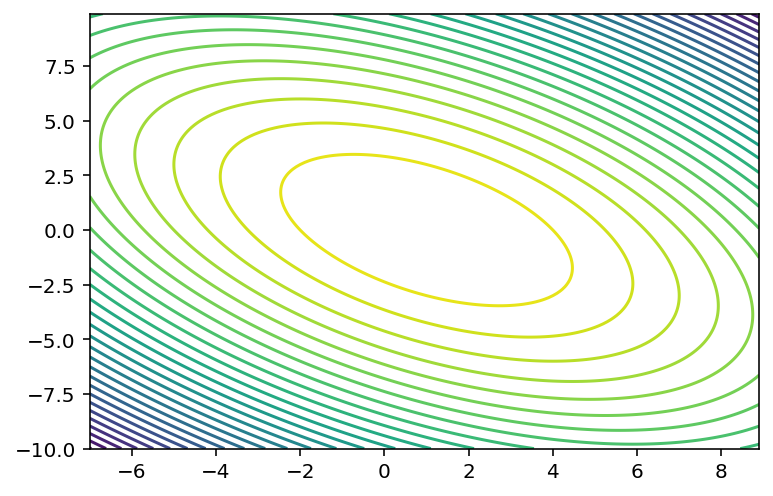

In [32]:
mean_vec = jnp.array([1, 0])
cov_matrix = jnp.array([[4, -2], [-2, 4]])
prec_matrix = jnp.linalg.inv(cov_matrix)

step = 0.1
xmin, xmax = -8, 8
ymin, ymax = -10, 10
X_grid = jnp.mgrid[xmin:xmax:step, ymin:ymax:step] + mean_vec[:, None, None]

diff_grid = X_grid - mean_vec[:, None, None]
log_prob_grid = -jnp.einsum("inm,ij,jnm->nm", diff_grid, prec_matrix, diff_grid) / 2
plt.contour(*X_grid, log_prob_grid, 30);

We expand the previous idea to the case of a set of multivariate Gaussians with constant mean and multiple covariance matrices.

Recall that the einsum expression to compute the log-density of a bivariate normal over a region $\mathcal X \subseteq \mathbb{R}^2$ is given by `inm,ij,jnm->nm`. Assuming that we have a set of $K$ Gaussian distributions. For each index $k$, we have a precision matrix ${\bf S}_k$ and constant mean $\boldsymbol\mu \in \mathbb{R}^M$. To compute the density over each of the regions we simply modify our previous expression to take account of a new *static* dimension `k`. We obtain `inm,kij,jnm->knm`. 

As an example, consider the collection of four covariance matrices `C1`,`C2`,`C3`,`C4`. We show that einsums can be used to compute the log-density over the multiple Gaussians

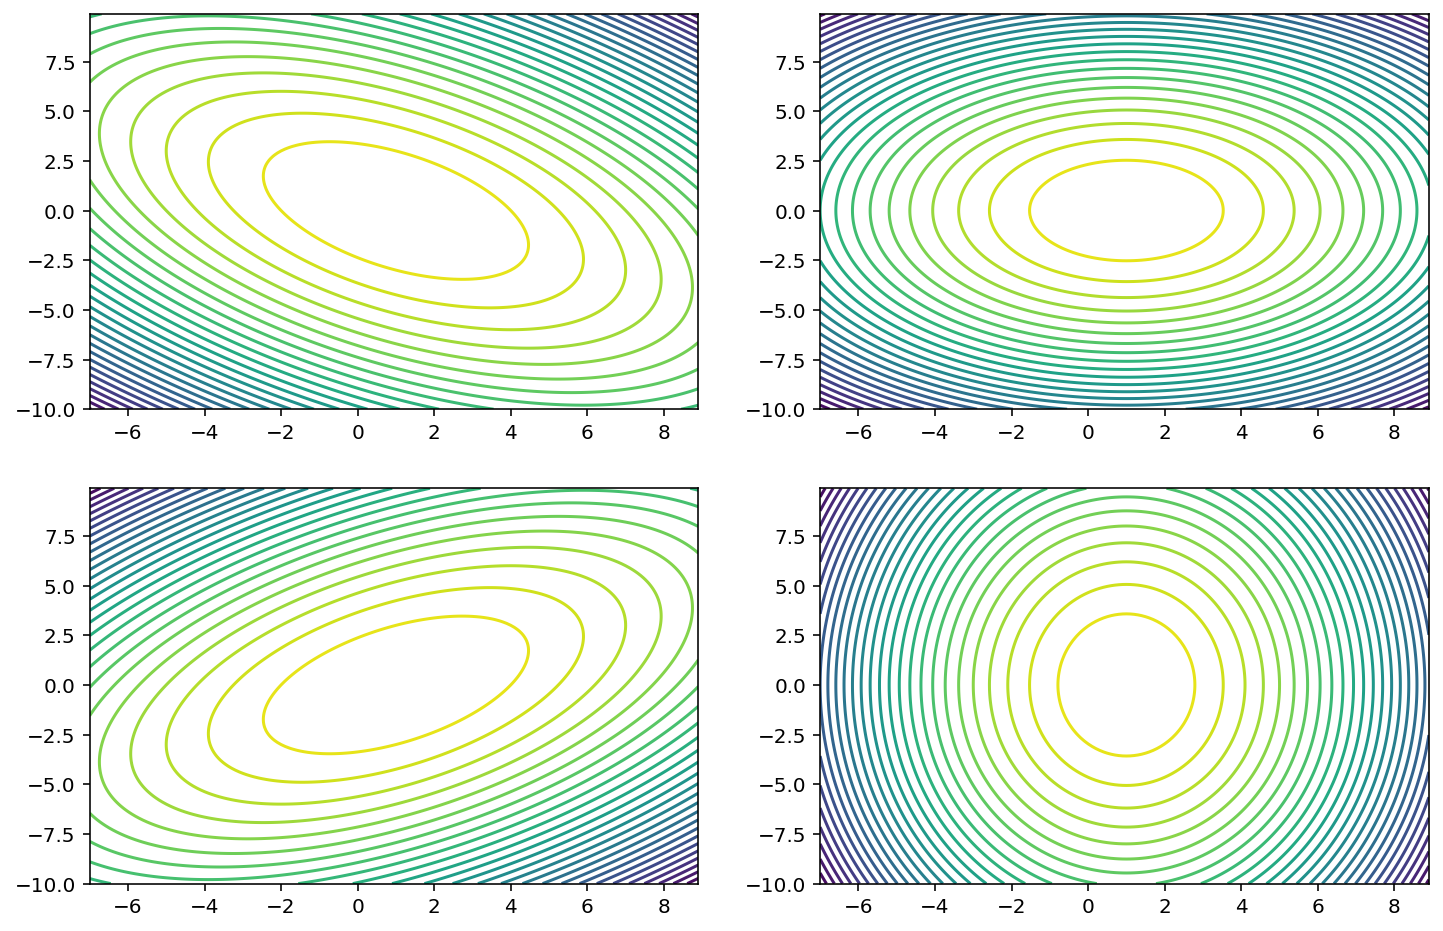

In [38]:
C1 = jnp.array([[4, -2], [-2, 4]])

C2 = jnp.array([[4, 0], [0, 4]])

C3 = jnp.array([[4, 2], [2, 4]])

C4 = jnp.array([[1, -2], [2, 4]])

C = jnp.stack([C1, C2, C3, C4], axis=0)
S = jnp.linalg.inv(C)  # inversion over the fist dimension

log_prob_grid_multiple = -jnp.einsum("inm,kij,jnm->knm", diff_grid, S, diff_grid) / 2

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()
for axi, log_prob_grid in zip(ax, log_prob_grid_multiple):
    axi.contour(*X_grid, log_prob_grid, 30)

To recap, the einsum expression for the Mahalanobis distance distance evaluated at $\bf x$ is given by 

- `i,ij,ij->` for a single array (a vector),
- `ni,ij,nj->n` for a collection of $M$-dimensional arrays (a matrix of observations),
- `nmi,ij,nmj->nm` for a grid of of $M$-dimensional arrays,
- `nmi,kij,nmj->knm`for a grid of $M$ dimensional arrays evaluated over different precision matrices.

## Predictive surface of a Bayesian logistic regression model

As long as the inner-most operation we want to compute consists of a linear combination of elements we can make use of einsums. As a next example, consider the estimation of the predictive surface of a logistic regression with Gaussian prior. That is, we want to compute

$$
\begin{aligned}
p(\hat y = 1 \vert {\bf x}) &= \int_{\mathbb{R}^2} \sigma({\bf w}^T {\bf x}) p({\bf w} \vert \mathcal{D}) d{\bf w}\\
&= \mathbb{E}{{\bf w} \vert \mathcal{D}}\big[\sigma({\bf w}^T {\bf x})\big]\\
&\approx \frac{1}{S} \sum_{s=1}^S \sigma\left({\bf w^{(s)}}^T {\bf x}\right)
\end{aligned}
$$

Suppose we estimated the posterior parameters $\hat{\bf w}, \hat\Sigma$. Since the posterior predictive distribution is analytically intractable, we turn to a Monte Carlo approximation of the posterior predictive surface. As with the previous two examples, we want to compute $p(\hat y = 1 \vert {\bf x})$ over a surface $\mathcal X \subseteq \mathbb{R}^2$. In this scenario, we have $S$ samples of weights sampled from the posterior ${\bf w} \vert \mathcal D$ which we wish to evaluate over all points in the grid $\mathcal X$. Recalling that the dot product between two vectors is written in einsum form as `m,m->`, to obtain a 3-dimensional array comprising of $S$simulations evaluated at each point in $\mathcal X$, we simply expand the dot product expression to contain the *static* indices `s` for the simulation and `i,j` for the position in the grid. We obtain `sm,mij->sij`. After obtaining the grid `sij`, we can compute the approximated predictive distribution by applying the logistic function over each element and averaging over `s`. The following code shows how to achieve this.

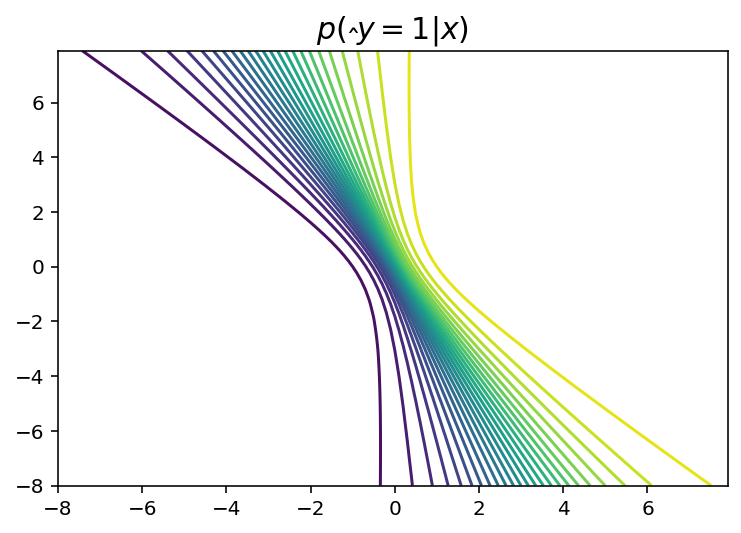

In [40]:
# Estimated posterior mean and precision matrix
w_hat = jnp.array([4.29669692, 1.6520908])
S_hat = jnp.array([[2.74809243, 0.76832627], [0.76832627, 0.88442754]])
C_hat = jnp.linalg.inv(S_hat)

n_samples = 1_000
boundary, step = 8, 0.1
key = jax.random.PRNGKey(314)
X_grid = jnp.mgrid[-boundary:boundary:step, -boundary:boundary:step]

w_samples = jax.random.multivariate_normal(key, w_hat, S_hat, shape=(n_samples,))

logit_grid = jnp.einsum("sm,mij->sij", w_samples, X_grid)
P_grid = jax.nn.sigmoid(logit_grid).mean(axis=0)
plt.contour(*X_grid, P_grid, 30)
plt.title(r"$p(\hat y = 1 \vert x)$", fontsize=15);

## Image compression: Singular value decomposition

A typical example that one encounters learning about singular value decomposition (SVD) is the use of SVD to decompress an image. As a heuristic example, suppose we want to compare the SVD of an image over multiple thresholds. That is, we decompose an image $\bf P$ as 

$$
{\bf P} \stackrel{\text{einsum}}{\equiv} {\bf c}_{k}{\bf L}_{(n),(m),k} \in\mathbb{R}^{N\times M} \equiv \texttt{c,ijc->ij}
$$

It’s a classical result of linear algebra that our matrix $\bf P$ can be factorised as

$$
{\bf P} = {\bf U}\boldsymbol\Sigma {\bf V}^T,
$$

where ${\bf U}\in\mathbb{R}^{M\times M}$, ${\bf V}\in\mathbb{R}^{N\times N}$, and $\boldsymbol\Sigma \in\mathbb{R}^{M\times N}$ is a matrix with diagonal terms $\{\sigma_1, \sigma_2, \ldots, \sigma_{\min(n,m)}\}$ and zero everywhere else. In scipy, the SVD decomposition of $\bf P$ is conviniently factorised (in einsum form) as

$$
{\bf P} \stackrel{\text{einsum}}{\equiv}\hat{\bf U}_{(n),k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, (m)}
$$

where $\hat{\bf U}\in\mathbb{R}^{M\times R}$, $\hat{\bf U}\in\mathbb{R}^{M\times R}$, $\boldsymbol\sigma=\{\sigma_1 \ldots, \sigma_R\}$, and  $R = \min(M,N)$.

As a pedagogical example, suppose we wish to approximate the matrix $\bf P$ using the first $K < R$ singular components. First, we observe that the ($n,m$)-th entry of $\bf P$ is given by

$$
{\bf P}_{n,m} = \sum_{k=1}^R \hat{\bf U}_{n,k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, m}
$$

If we wish to consider the first $K$ components of ${\bf P}_{n,m}$, we only need to modify the limit term in the sum to obtain.

$$
\sum_{k=1}^K \hat{\bf U}_{n,k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, m}
$$

However, this last expression cannot be represented in einsum notation. As me mentioned at the beginning, every einsum expression assumes that the sum is over **all** chosen indices. To get around this constraint, we simply introduce the 1-dimensional vector ${\bf 1}_{\cdot \leq K}$ of size $R$ that has value $1$ for the first $K$ entries and $0$ for the rest $R-K$ elements. Hence, we write the approximation of the matrix $\bf P$ using the first $K$ singular components as

$$
\sum_{k=1}^R \hat{\bf U}_{n,k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, m} ({\bf 1}_{\cdot \leq K})_{k}
$$

We observe that this is easily written in einsum form as

$$
\hat{\bf U}_{(n),k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, (m)}({\bf 1}_{\cdot \leq K})_{k} \equiv \texttt{nk,k,km,k->nm}
$$

We could also consider multiple values of $K$. To do this, we define the 2-dimensional array

$$
{\bf I} = \begin{bmatrix}
{\bf 1}_{\cdot \leq K}\\
{\bf 1}_{\cdot \leq K_2}\\
\vdots\\
{\bf 1}_{\cdot \leq K_C}\\
\end{bmatrix}
$$

Next, we simply modify our previous expression to take into account the additional static dimension of the matrix $\bf I$. We obtain 

$$
\begin{aligned}
\hat{\bf U}_{(n),k}\hat{\boldsymbol\sigma}_{k} \hat{\bf V}_{k, (m)}{\bf I}_{(c), k}  &\equiv \texttt{nk,k,km,ck->nmc}\\
 &\equiv \texttt{nk,k,km,ck->cnm}
\end{aligned}
$$

We provide an example of this idea in the next code: first, we load an image living in a 3-dimensional array. Next, we transform it `img` to obtain a 2-dimensional array `img_gray`. We perform SVD over `img_gray` and define a matrix `indexer` containing our different thresholds. Finally, we make use of our previously-defined expression to compute the SVD approximation of the image at the different values defined in `indexer`.

/var/folders/vf/3b13gs616172kztlr53t6_s00000gn/T/ipykernel_37379/3929052536.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(FILEPATH)


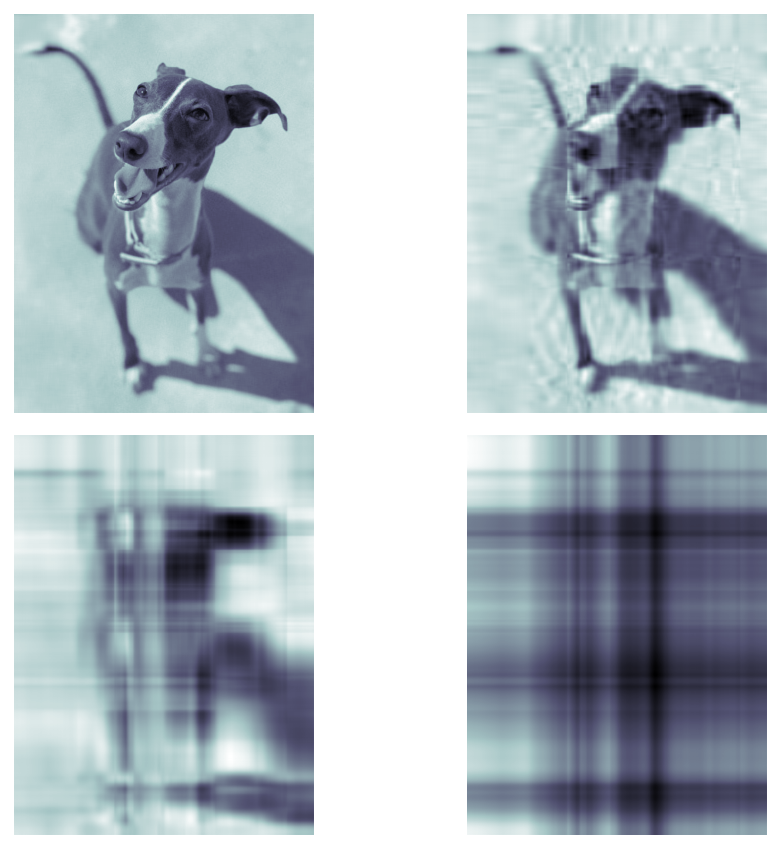

In [70]:
FILEPATH = os.environ.get("FILEPATH") or "https://i.imgur.com/p91lldL.png"

img = plt.imread(FILEPATH)

c_weights = jnp.array([0.2989, 0.5870, 0.1140])
img_gray = jnp.einsum("c,ijc->ij", c_weights, img)
U, s, Vh = jax.scipy.linalg.svd(img_gray, full_matrices=False)

indexer = s[:, None] > jnp.array([1, 10, 50, 100])
img_svd_collection = jnp.einsum("ni,i,im,ik->knm", U, s, Vh, indexer)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.ravel()
for axi, img_svd in zip(ax, img_svd_collection):
    axi.imshow(img_svd, cmap="bone")
    axi.axis("off")
plt.tight_layout(w_pad=-1)

### Misc examples

- Computing the state-value and action-value function in a tabular space  
For an example, see [this notebook](https://github.com/sapienzaio/reinforcement-learning/blob/main/ch04/gridworld-policy-evaluation.ipynb)

```python
single_reward = (rewards[None, :] + vk[:, None])
vk_update = np.einsum("ijkl,ij->k", p_gridworld, single_reward) / num_actions
```

- Diagonal extended Kalman filter (dEKF)  
For an example, see[this script](https://github.com/probml/JSL/blob/main/jsl/nlds/diagonal_extended_kalman_filter.py)

```bash
A = jnp.linalg.inv(Rt + jnp.einsum("id,jd,d->ij", Ht, Ht, Vt))
mu_t = mu_t_cond + jnp.einsum("s,is,ij,j->s", Vt, Ht, A, xi)
Vt = Vt - jnp.einsum("s,is,ij,is,s->s", Vt, Ht, A, Ht, Vt) + self.Q(mu_t, t)
```